In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random

from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import IsolationForest
from sklearn.metrics import average_precision_score, precision_score, \
                        recall_score, precision_recall_curve, roc_curve, \
                        roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle



# I prepared these libraries for you
! wget https://raw.githubusercontent.com/andreaaraldo/machine-learning-for-networks/master/course_library/andrea_models.py
! wget https://raw.githubusercontent.com/andreaaraldo/machine-learning-for-networks/master/course_library/visualization.py
from andrea_models import subsample
from visualization import silhouette_diagram, plot_conf_mat, \
                      false_positive_rate, evaluate_anomaly_detector



# To show time at each cell
# Credits to https://medium.com/@arptoth/how-to-measure-execution-time-in-google-colab-707cc9aad1c8
!pip install ipython-autotime 
%load_ext autotime

--2022-02-21 04:36:25--  https://raw.githubusercontent.com/andreaaraldo/machine-learning-for-networks/master/course_library/andrea_models.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3190 (3.1K) [text/plain]
Saving to: ‘andrea_models.py’

andrea_models.py    100%[===================>]   3.12K  --.-KB/s    in 0s      

2022-02-21 04:36:26 (23.4 MB/s) - ‘andrea_models.py’ saved [3190/3190]

--2022-02-21 04:36:26--  https://raw.githubusercontent.com/andreaaraldo/machine-learning-for-networks/master/course_library/visualization.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


time: 1.5 ms (started: 2022-02-21 04:36:38 +00:00)


In [ ]:
np.random.seed(9)
random.seed(9) 

time: 2.62 ms (started: 2022-02-21 04:36:38 +00:00)


In [ ]:
path = "https://raw.githubusercontent.com/Werner-DB/ML_Project/main/PreProcessing/dataset_cleaned_exp.csv" # path for the preprocessed datadet
!wget $path

--2022-02-21 04:39:01--  https://raw.githubusercontent.com/Werner-DB/ML_Project/main/PreProcessing/dataset_cleaned_exp.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.110.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3924758 (3.7M) [text/plain]
Saving to: ‘dataset_cleaned_exp.csv’

dataset_cleaned_exp 100%[===================>]   3.74M  --.-KB/s    in 0.04s   

2022-02-21 04:39:02 (92.6 MB/s) - ‘dataset_cleaned_exp.csv’ saved [3924758/3924758]

time: 840 ms (started: 2022-02-21 04:39:01 +00:00)


In [ ]:
df = pd.read_csv("dataset_cleaned_exp.csv", index_col="PROC_TRACEINFO")
df.head()

,OP070_V_1_angle_value,OP090_SnapRingPeakForce_value,OP070_V_2_angle_value,OP120_Rodage_I_mesure_value,OP090_SnapRingFinalStroke_value,OP110_Vissage_M8_torque_value,OP120_Rodage_U_mesure_value,OP070_V_1_torque_value,OP090_StartLinePeakForce_value,OP110_Vissage_M8_angle_value,OP090_SnapRingMidPointForce_val,OP070_V_2_torque_value,results
PROC_TRACEINFO,,,,,,,,,,,,,
I-B-XA1207672-190429-00688,180.4,190.51,173.1,113.64,12.04,12.16,11.97,6.62,26.37,18.8,109.62,6.60,0
I-B-XA1207672-190828-00973,138.7,147.70,163.5,109.77,12.12,12.19,11.97,6.41,21.03,18.5,105.48,6.40,0
I-B-XA1207672-190712-03462,180.9,150.87,181.2,109.79,11.86,12.24,11.97,6.62,25.81,17.5,100.03,6.61,0
I-B-XA1207672-190803-00051,173.5,159.56,151.8,113.25,11.82,12.35,11.97,6.62,24.62,15.6,104.94,6.61,0
I-B-XA1207672-190508-03248,174.5,172.29,177.5,112.88,12.07,12.19,11.97,6.62,29.22,33.6,99.19,6.61,0


time: 116 ms (started: 2022-02-21 04:39:02 +00:00)


In [ ]:
df['results'].value_counts()

0    34210
1      305
Name: results, dtype: int64

time: 8.05 ms (started: 2022-02-21 04:39:02 +00:00)


In [ ]:
num_of_normal = sum( df['results']==0 )
num_of_anomalies = sum( df['results']==1 )
num_of_anomalies/num_of_normal

0.008915521777258111

time: 17.9 ms (started: 2022-02-21 04:39:02 +00:00)


In [ ]:
X = df.drop('results', axis=1)
y = [1 if c==1 else 0 for c in df['results']] 
print(y)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

# Tune the Precision-Recall curve and the ROC curve

We will apply isolation forests on the Valeo Dataset to see if it's useful. 

In [ ]:
X, y = shuffle(X,y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5)
model = IsolationForest()

time: 42.2 ms (started: 2022-02-21 04:39:02 +00:00)


In [ ]:
model.fit(X_train)
anomaly_scores = 0.5 - model.decision_function(X_train)

time: 907 ms (started: 2022-02-21 04:39:02 +00:00)


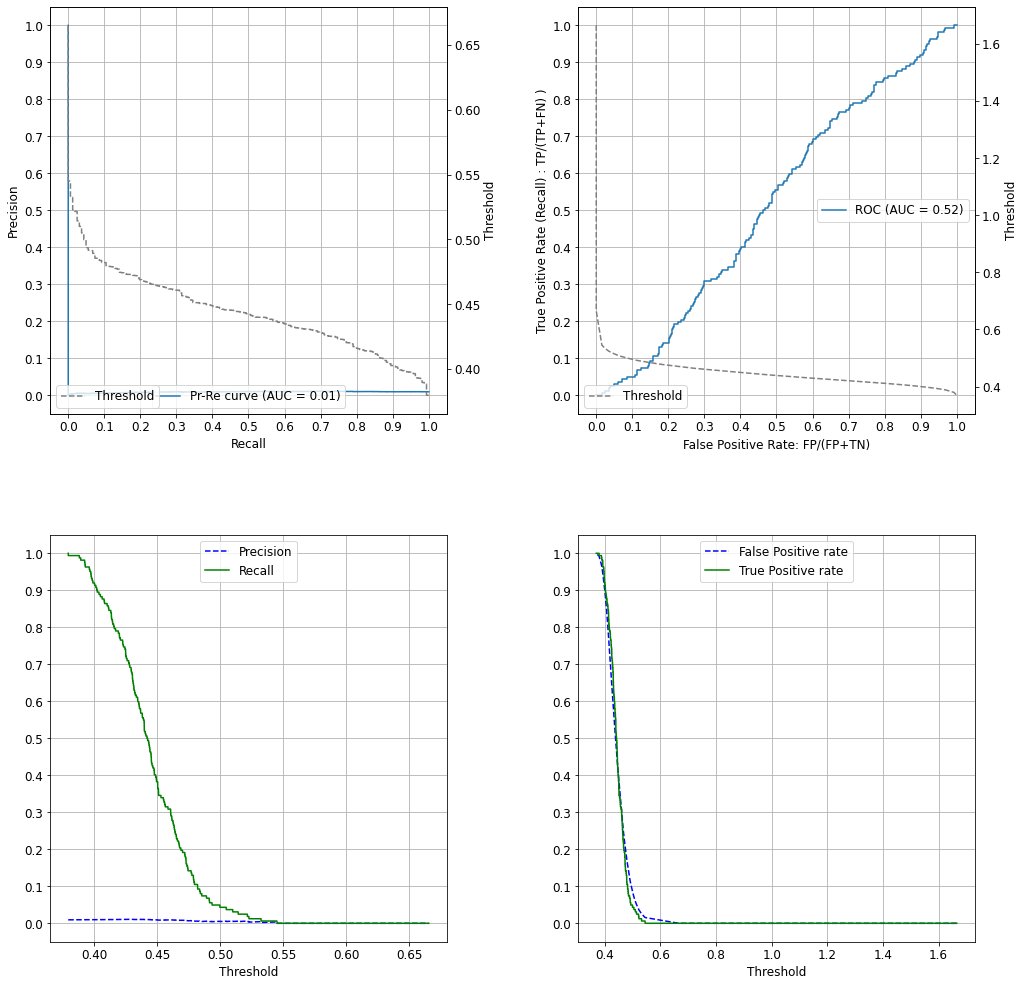

time: 1.25 s (started: 2022-02-21 04:39:03 +00:00)


In [ ]:
evaluate_anomaly_detector(y_train, anomaly_scores)

# Increasing the Number of trees

In [ ]:
model = IsolationForest(n_estimators=500)
model.fit(X_train)

IsolationForest(n_estimators=500)

time: 1.48 s (started: 2022-02-21 04:39:04 +00:00)


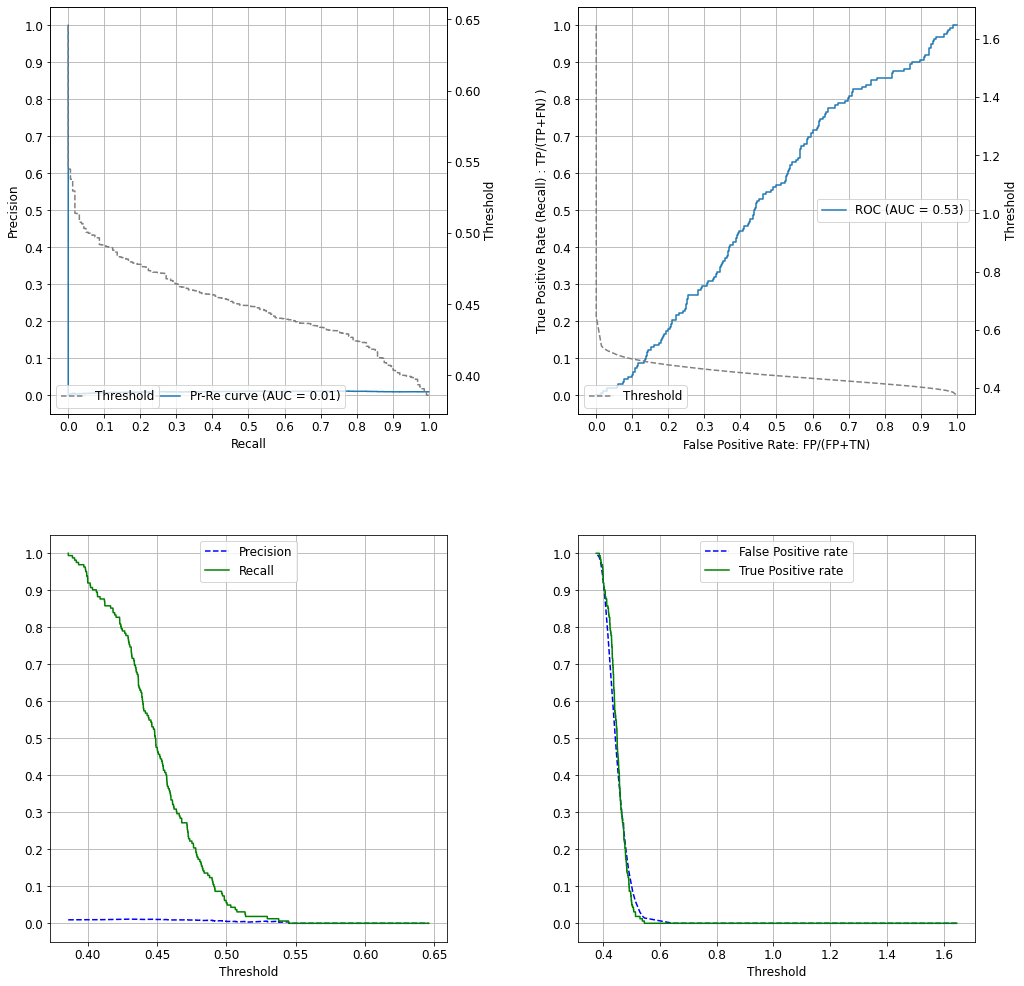

time: 4.95 s (started: 2022-02-21 04:39:06 +00:00)


In [ ]:
anomaly_scores = 0.5 - model.decision_function(X_train)
evaluate_anomaly_detector(y_train, anomaly_scores)

# GridSearch with Same Number of Trees of the last result

In [ ]:
iforest = IsolationForest(n_estimators=500)

for max_features in [1, 5, 11]:
  for max_samples in range(256, X_train.shape[0], int(X_train.shape[0] / 3) ):
    model = IsolationForest(n_estimators=500, max_features=max_features,
                            max_samples = max_samples)
    model.fit(X_train)
    anomaly_scores = 0.5 - model.decision_function(X_train)
    auc_score = average_precision_score(y_train, anomaly_scores)
    print("max_fetaures:", max_features, "; max_samples:", max_samples, 
          "auc_score:", auc_score)

max_fetaures: 1 ; max_samples: 256 auc_score: 0.00924966565358575
max_fetaures: 1 ; max_samples: 6008 auc_score: 0.008712554859600794
max_fetaures: 1 ; max_samples: 11760 auc_score: 0.0087135180916893
max_fetaures: 5 ; max_samples: 256 auc_score: 0.0096278080054019
max_fetaures: 5 ; max_samples: 6008 auc_score: 0.009308559493886946
max_fetaures: 5 ; max_samples: 11760 auc_score: 0.009158654707035752
max_fetaures: 11 ; max_samples: 256 auc_score: 0.009648962654700754
max_fetaures: 11 ; max_samples: 6008 auc_score: 0.009507931998828824
max_fetaures: 11 ; max_samples: 11760 auc_score: 0.009637244385896752
time: 1min 4s (started: 2022-02-21 04:39:11 +00:00)


In [ ]:
model = IsolationForest(n_estimators=500, max_features=max_features,
                        max_samples=max_samples)

model.fit(X_train)

IsolationForest(max_features=11, max_samples=11760, n_estimators=500)

time: 4.98 s (started: 2022-02-21 04:40:51 +00:00)


In [ ]:
anomaly_scores = 0.5 - model.decision_function(X_train)

time: 5.93 s (started: 2022-02-21 04:40:56 +00:00)


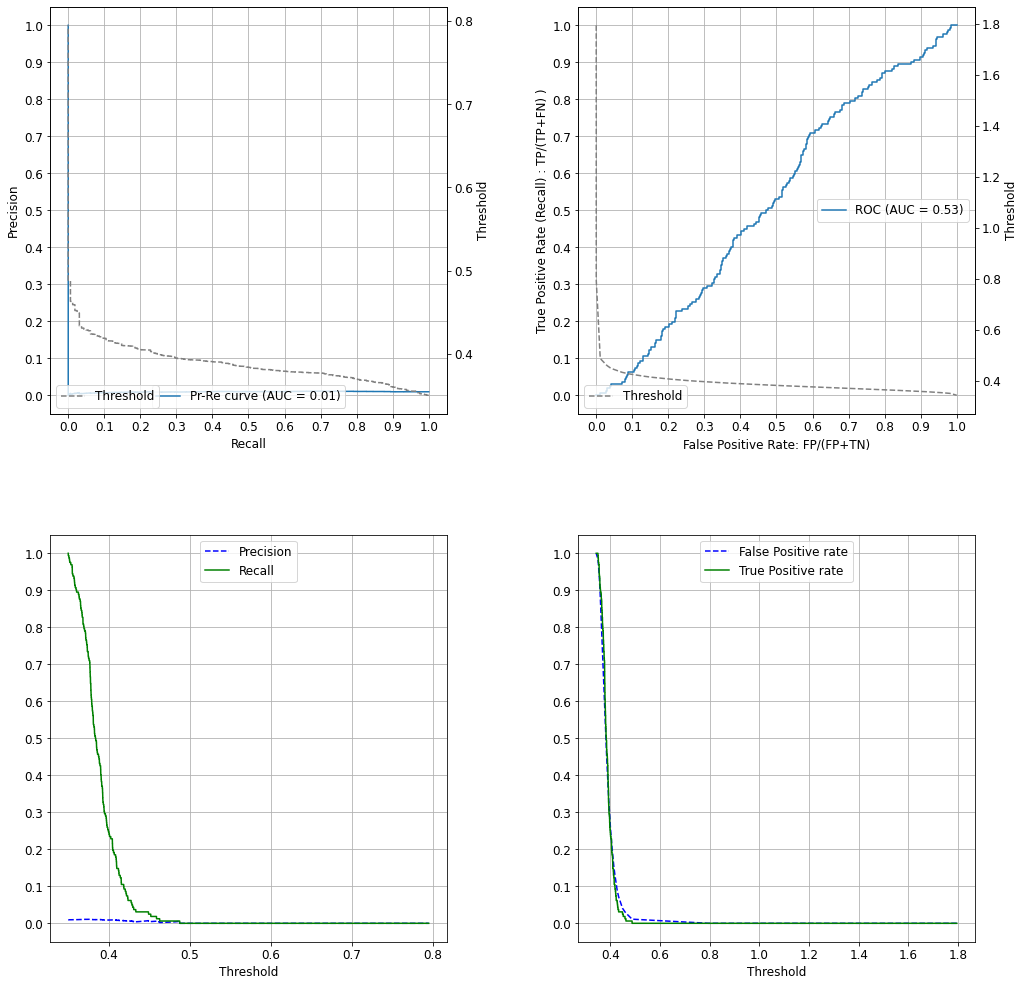

time: 1.15 s (started: 2022-02-21 04:41:02 +00:00)


In [ ]:
evaluate_anomaly_detector(y_train, anomaly_scores)

# Increasing Number of Trees

In [ ]:
n_estimators = 1500

model = IsolationForest(n_estimators=n_estimators, max_features=max_features,
                        max_samples=max_samples)

model.fit(X_train)

IsolationForest(max_features=11, max_samples=11760, n_estimators=1500)

time: 9.05 s (started: 2022-02-21 04:41:03 +00:00)


In [ ]:
anomaly_scores = 0.5 - model.decision_function(X_train)

time: 15.8 s (started: 2022-02-21 04:41:13 +00:00)


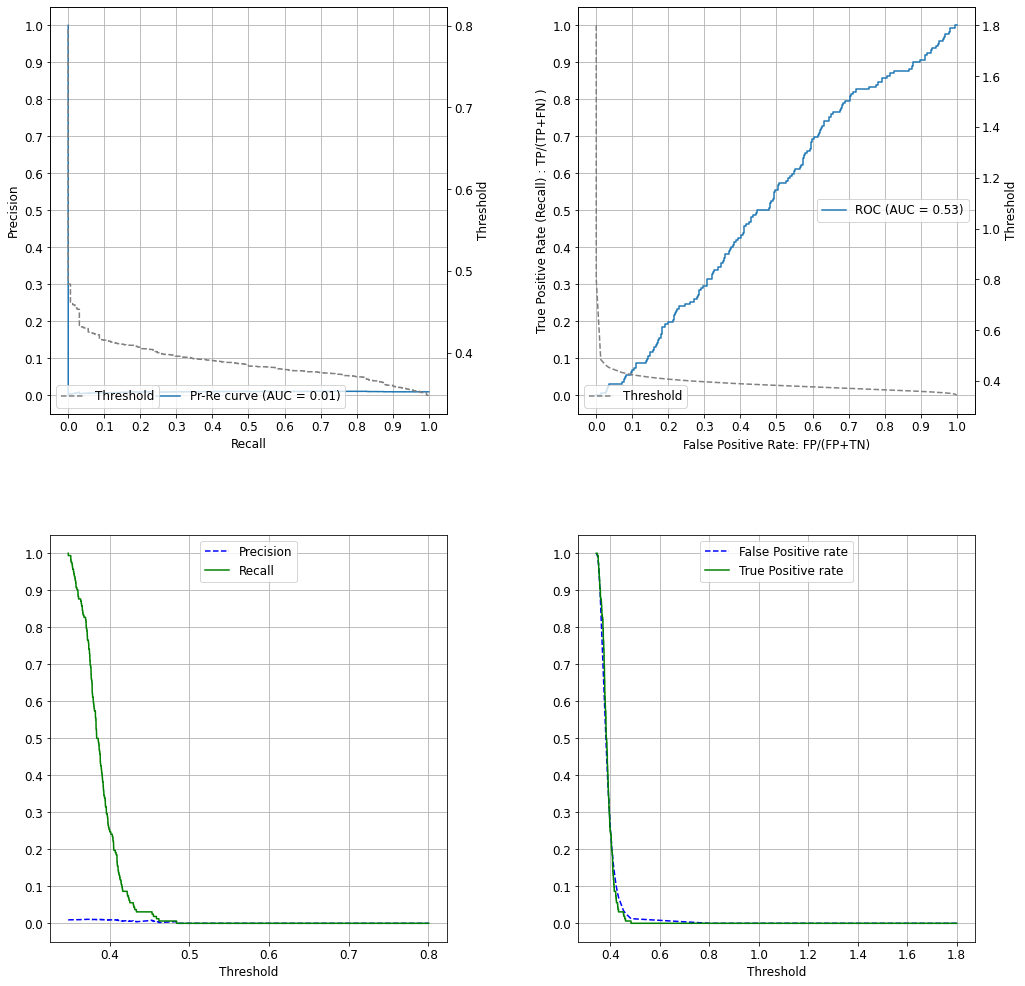

time: 1.41 s (started: 2022-02-21 04:41:28 +00:00)


In [ ]:
evaluate_anomaly_detector(y_train, anomaly_scores)

Choosing the threshold

Precision= 0.010748343300468725
Recall= 0.8209876543209876
False Positive Rate =  0.7160573267037146
True Positive Rate =  0.8209876543209876


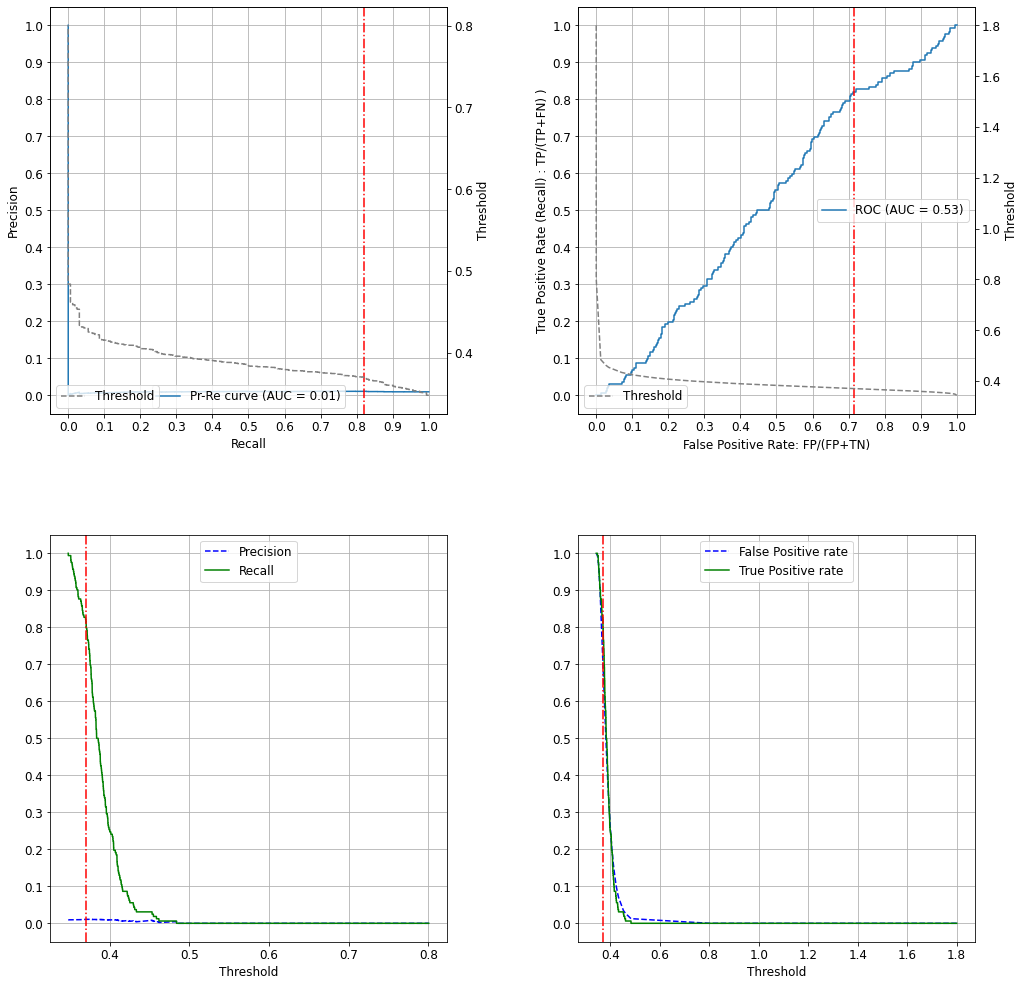

time: 3.01 s (started: 2022-02-21 04:49:48 +00:00)


In [ ]:
threshold_selected = 0.37

evaluate_anomaly_detector(y_train, anomaly_scores, threshold_selected)

# Test the model

In [ ]:
model.fit(X_test)
an_scores = 0.5 - model.decision_function(X_test)

time: 23.6 s (started: 2022-02-21 04:50:09 +00:00)


In [ ]:
y_pred = (an_scores >= threshold_selected)

precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
fpr = false_positive_rate(y_test, y_pred)

print("precision=", precision)
print('recall=', recall)
print('false positive rate=', fpr)

precision= 0.00871174157736489
recall= 0.7902097902097902
false positive rate= 0.751270815074496
time: 53 ms (started: 2022-02-21 04:50:32 +00:00)


Normalized confusion matrix
[[0.24872918 0.75127082]
 [0.20979021 0.79020979]]


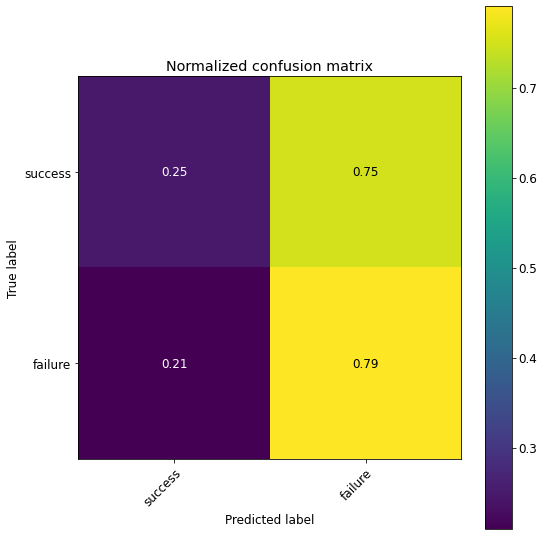

time: 561 ms (started: 2022-02-21 04:50:33 +00:00)


In [ ]:
class_names= np.array( ['success', 'failure'] )
plot_conf_mat(y_test, y_pred, class_names)